In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


2024-02-03 11:22:57.414077: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-03 11:22:57.414105: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-03 11:22:57.423542: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-03 11:22:57.446208: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)


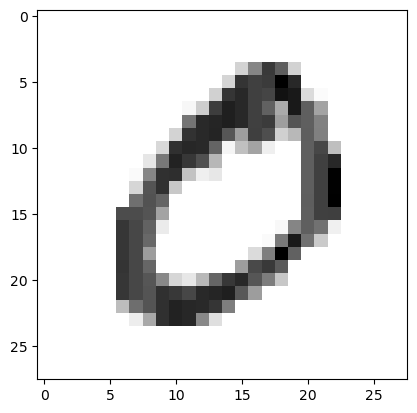

In [3]:
def draw(n):
	plt.imshow(n,cmap=plt.cm.binary)
	plt.show() 
	
draw(x_train[1])


In [4]:
#there are two types of models
#sequential is most common, why?

model = tf.keras.models.load_model("/home/mrv/coding/ml/epic_num_reader.h5")

# model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
# #reshape

# model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
# model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
# model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
# model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
# model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy']
			)
model.fit(x_train,y_train,epochs=3)
model.save('epic_num_reader.h5')


2024-02-03 11:23:10.587418: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-03 11:23:10.664686: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-03 11:23:10.665105: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Epoch 1/3


2024-02-03 11:23:12.180053: I external/local_xla/xla/service/service.cc:168] XLA service 0x7d89ebfb6880 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-03 11:23:12.180100: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2024-02-03 11:23:12.197781: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-03 11:23:12.232820: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1706939592.302714   24608 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 11s 5ms/step - loss: 0.0076 - accuracy: 0.9987
Epoch 2/3
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0103 - accuracy: 0.9983
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0097 - accuracy: 0.9983


In [5]:
val_loss,val_acc = model.evaluate(x_test,y_test)
print("loss-> ",val_loss,"\nacc-> ",val_acc)


313/313 [==============================] - 1s 4ms/step - loss: 0.1908 - accuracy: 0.9760
loss->  0.1908082216978073 
acc->  0.9760000109672546


313/313 [==============================] - 1s 2ms/step
label ->  0
prediction ->  0


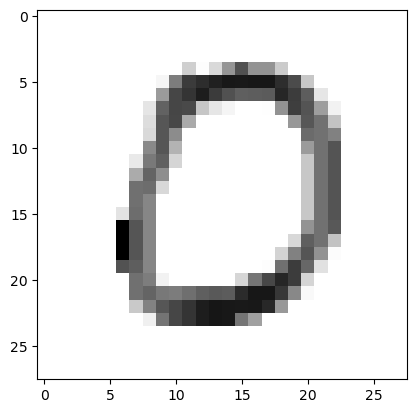

In [6]:
i=10
predictions=model.predict([x_test])
print('label -> ',y_test[i])
print('prediction -> ',np.argmax(predictions[i]))
draw(x_test[i])


In [9]:
#saving the model
# .h5 or .model can be used

model.save('epic_num_reader.h5')
